# Analizing data
### In this notebook we will retrive scraped info and analyze it

In [1]:
import pandas as pd
import math
import psycopg2 as ps
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt 

In [2]:
cars_data = pd.read_csv('tosqldb_f.csv')

In [3]:
cars_data.shape

(35065, 14)

In [4]:
cars_data.columns

Index(['id', 'brand', 'model', 'colour', 'fuel', 'doors', 'engine', 'location',
       'price', 'year', 'transmision', 'km', 'type', 'url'],
      dtype='object')

In [5]:
cars_data.describe()

,id,doors,price,year,km
count,35065.000000,35065.000000,3.506500e+04,35065.000000,35065.000000
mean,18286.611008,774.315642,2.588213e+06,2782.180151,94734.811037
std,29070.489608,27738.438520,2.688792e+06,27682.701180,78175.338900
min,0.000000,-5.000000,1.000000e+03,1928.000000,1.000000
25%,8771.000000,4.000000,8.000000e+05,2012.000000,46000.000000
50%,17542.000000,5.000000,2.250000e+06,2015.000000,82000.000000
75%,26316.000000,5.000000,3.687000e+06,2018.000000,126000.000000
max,1000000.000000,1000000.000000,1.300000e+08,1000000.000000,1000000.000000


We see an annomally in data, since max values go to very big numbers, we remove those values
Also prices are mixed in ARS and USD, so we unify all to ARS
Apart from that we will take out luxury cars from this dataset

In [6]:
cars_data[cars_data["id"]>40000]

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url
4776,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
6064,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
7669,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
7670,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
8427,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
11845,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
13436,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
14339,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
15901,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
17394,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000


In [7]:
cars_data = cars_data.drop(cars_data[cars_data["id"]>40000].index)

In [8]:
cars_data = cars_data.drop(cars_data[cars_data["km"]>700000].index)

In [9]:
#cars_data = cars_data.drop(cars_data[(cars_data["price"]>150000) & (cars_data["price"]<400000) & (cars_data["year"]>2010)].index)

In [10]:
cars_data['currency'] = 'ARS'
cars_data.loc[cars_data['currency'][(cars_data["price"] < 200000)].index,'currency'] = 'USD'

In [11]:

# f1 = (cars_data["price"]<400000) & (cars_data["year"]>2010)
# f2 = (cars_data["price"]<10000)
# cars_data['price'] = cars_data['price'].apply(lambda x: x*200 if x in cars_data[f1]['price'].values else x)
# cars_data['price'] = cars_data['price'].apply(lambda x: x*200 if x in cars_data[f2]['price'].values else x)

In [12]:
cars_data[cars_data['currency']=='USD'].sort_values('price', ascending=False)[:20]

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url,currency
2542,2542,BMW,Serie 8,Azul,Nafta,2,4.4,San Telmo - Capital Federal - Capital Federal,199000,2020,Automatica,3400,Coupe,https://auto.mercadolibre.com.ar/MLA-113002071...,USD
25651,25651,Land Rover,Evoque,Negro,Nafta,5,NaN,Centro - Santiago del Estero - Santiago del Es...,195000,2020,Automatica,15000,NaN,https://auto.mercadolibre.com.ar/MLA-113603094...,USD
13249,13249,Porsche,Macan,NaN,Nafta,2,3.6,Tigre - Bs.As. G.B.A. Norte,195000,2017,Manual,14000,SUV,https://auto.mercadolibre.com.ar/MLA-113051621...,USD
23623,23623,Hyundai,Sonata,Azul,Nafta,4,2.0,Caballito - Capital Federal - Capital Federal,195000,1995,Automatica,185000,Sedan,https://auto.mercadolibre.com.ar/MLA-113501358...,USD
926,926,Audi,Q8,Grey,Nafta,5,3.0,Villa Devoto - Capital Federal - Capital Federal,194900,2021,Automatica,3000,SUV,https://auto.mercadolibre.com.ar/MLA-112515219...,USD
309,309,Audi,Q8,Gris,Nafta,5,3.0,Villa Devoto - Capital Federal - Capital Federal,194900,2021,Automatica,3000,SUV,https://auto.mercadolibre.com.ar/MLA-112514573...,USD
1530,1530,Audi,Q8,Grau,Nafta,5,3.0,Villa Devoto - Capital Federal - Capital Federal,194900,2021,Automatica,3000,SUV,https://auto.mercadolibre.com.ar/MLA-112517156...,USD
25708,25708,Land Rover,Evoque,NaN,Nafta,5,2.0,San Fernando del Valle de Catamarca - Catamarca,190000,2021,Manual,11000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113733452...,USD
30155,30155,Porsche,Cayenne,Blanco,Nafta,5,3.0 Turbo 340cv,Capital Federal - Capital Federal,190000,2019,Automatica,19500,SUV,https://auto.mercadolibre.com.ar/MLA-113364257...,USD
27005,27005,Mercedes-Benz,Clase GLE,NaN,Nafta,5,NaN,Rio Cuarto - Cordoba,187000,2018,NaN,12000,NaN,https://auto.mercadolibre.com.ar/MLA-113133455...,USD


In [13]:
cars_data['price_ars'] = cars_data['price'].apply(lambda x: x*200 if x <= 150000 else x) #Convert to ARS
cars_data = cars_data.drop(cars_data[cars_data["price_ars"]>15000000].index)

##### We also remove the brands that show less than 10  times, we dont lose much data and it brings noise to the charts

In [14]:
cars_data['brand'].value_counts() #We see many brand of "1" car, this translate in bad user input. We can drop them or try to match with the real brand
cars_data['brand'].value_counts()<5
cars_data.groupby('brand').filter(lambda x : len(x)>10)['brand'].value_counts()
cars_data = cars_data.groupby('brand').filter(lambda x : len(x)>10)

In [15]:
cars_data.loc[cars_data[cars_data['doors']<0].index,'doors'] = 5 #There were some "negative doors"

In [16]:
cars_data.describe()#this looks better

,id,doors,price,year,km,price_ars
count,34341.000000,34341.000000,3.434100e+04,34341.000000,34341.000000,3.434100e+04
mean,17595.106753,4.325151,2.594756e+06,2013.722722,94092.799336,3.872797e+06
std,10096.159649,0.891122,2.269636e+06,6.768443,68114.981903,2.609835e+06
min,0.000000,1.000000,1.000000e+03,1928.000000,1.000000,1.550000e+05
25%,8859.000000,4.000000,9.500000e+05,2011.000000,47500.000000,2.100000e+06
50%,17593.000000,5.000000,2.300000e+06,2015.000000,83000.000000,3.100000e+06
75%,26338.000000,5.000000,3.700000e+06,2018.000000,127000.000000,4.800000e+06
max,35064.000000,8.000000,1.500000e+07,2023.000000,700000.000000,1.500000e+07


In [17]:
cars_data.head()

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url,currency,price_ars
0,0,Alfa Romeo,Giulietta,Blanco,Nafta,5,1.4,Villa Urquiza - Capital Federal - Capital Federal,3500000,2016,Automatica,74000,Hatchback,https://auto.mercadolibre.com.ar/MLA-112111973...,ARS,3500000
1,1,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,Francisco Alvarez - Moreno - Bs.As. G.B.A. Oeste,2940000,2012,Automatica,62000,Hatchback,https://auto.mercadolibre.com.ar/MLA-112768737...,ARS,2940000
2,2,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,San Telmo - Capital Federal - Capital Federal,2880000,2017,Manual,48000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113661280...,ARS,2880000
3,3,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,San Andres de Giles - Buenos Aires Interior,13300,2010,Manual,51300,Hatchback,https://auto.mercadolibre.com.ar/MLA-113521519...,USD,2660000
4,4,Alfa Romeo,145,Gris,Nafta,3,1.8,Capital Federal - Capital Federal,849000,2000,Manual,10000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113457808...,ARS,849000


In [18]:
 cars_data["location"].str.split("-", expand=True)[[0,1,2]]

,0,1,2
0,Villa Urquiza,Capital Federal,Capital Federal
1,Francisco Alvarez,Moreno,Bs.As. G.B.A. Oeste
2,San Telmo,Capital Federal,Capital Federal
3,San Andres de Giles,Buenos Aires Interior,None
4,Capital Federal,Capital Federal,None
...,...,...,...
35059,Deseado,Santa Cruz,None
35061,La Matanza,Bs.As. G.B.A. Oeste,None
35062,Centro,Rosario,Santa Fe
35063,Caballito,Capital Federal,Capital Federal


###### we can also split the location data

In [19]:
cars_data[["neighborhood","city", "province"]] =  cars_data["location"].str.split("-", expand=True)[[0,1,2]]
cars_data[['city','province']] = cars_data[['city','province']].fillna(method='ffill',axis=1)#This is bc some locations had 2 values only
cars_data

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url,currency,price_ars,neighborhood,city,province
0,0,Alfa Romeo,Giulietta,Blanco,Nafta,5,1.4,Villa Urquiza - Capital Federal - Capital Federal,3500000,2016,Automatica,74000,Hatchback,https://auto.mercadolibre.com.ar/MLA-112111973...,ARS,3500000,Villa Urquiza,Capital Federal,Capital Federal
1,1,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,Francisco Alvarez - Moreno - Bs.As. G.B.A. Oeste,2940000,2012,Automatica,62000,Hatchback,https://auto.mercadolibre.com.ar/MLA-112768737...,ARS,2940000,Francisco Alvarez,Moreno,Bs.As. G.B.A. Oeste
2,2,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,San Telmo - Capital Federal - Capital Federal,2880000,2017,Manual,48000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113661280...,ARS,2880000,San Telmo,Capital Federal,Capital Federal
3,3,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,San Andres de Giles - Buenos Aires Interior,13300,2010,Manual,51300,Hatchback,https://auto.mercadolibre.com.ar/MLA-113521519...,USD,2660000,San Andres de Giles,Buenos Aires Interior,Buenos Aires Interior
4,4,Alfa Romeo,145,Gris,Nafta,3,1.8,Capital Federal - Capital Federal,849000,2000,Manual,10000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113457808...,ARS,849000,Capital Federal,Capital Federal,Capital Federal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35059,Volvo,S60,NaN,Nafta,4,NaN,Deseado - Santa Cruz,4500,1998,NaN,300000,NaN,https://auto.mercadolibre.com.ar/MLA-113064972...,USD,900000,Deseado,Santa Cruz,Santa Cruz
35061,35061,Volvo,S 122,NaN,Nafta,2,NaN,La Matanza - Bs.As. G.B.A. Oeste,5000,1963,NaN,111111,NaN,https://auto.mercadolibre.com.ar/MLA-113208746...,USD,1000000,La Matanza,Bs.As. G.B.A. Oeste,Bs.As. G.B.A. Oeste
35062,35062,Volvo,XC60,Azul,Nafta,5,2.0,Centro - Rosario - Santa Fe,14000,2011,Automatica,135000,SUV,https://auto.mercadolibre.com.ar/MLA-110875003...,USD,2800000,Centro,Rosario,Santa Fe
35063,35063,Volvo,S40,Blanco,Nafta,4,NaN,Caballito - Capital Federal - Capital Federal,2400000,2011,Automatica,68000,Sedan,https://auto.mercadolibre.com.ar/MLA-112101811...,ARS,2400000,Caballito,Capital Federal,Capital Federal


In [20]:
cars_data["brand"] = cars_data["brand"].str.replace("-"," ",regex=False)
cars_data.groupby('brand').size()

brand
Alfa Romeo        224
Audi             1914
BMW              1867
Chery             745
Chevrolet        2690
Chrysler          282
Citroen          2645
DS                197
Dodge             623
Fiat             2001
Ford             2003
Honda            2003
Hyundai           838
Isuzu              54
Jeep             1936
Kia               565
Land Rover        148
Mazda              58
Mercedes Benz    1867
Mini              325
Mitsubishi        310
Nissan           1848
Peugeot          2017
Porsche            82
RAM               277
Renault          1956
Smart              95
Subaru            114
Suzuki            451
Toyota           2004
Volkswagen       2047
Volvo             155
dtype: int64

Finally, we take cars after year 2000, as we see later on, they tend to follow a different price pattern

In [21]:
cars_data_all = cars_data.copy()
cars_data = cars_data[cars_data['year']>1990] #this is explained at the GRAPH section
cars_data.to_csv('carsdata_preprocessed.csv')

In [22]:
cars_data['colour'].value_counts()[:10] #We get the 10 most common colours
common_colours = cars_data['colour'].value_counts()[:5].index.values
common_colours = cars_data[cars_data['colour'].isin(common_colours)]

In [23]:
common_colours

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url,currency,price_ars,neighborhood,city,province
0,0,Alfa Romeo,Giulietta,Blanco,Nafta,5,1.4,Villa Urquiza - Capital Federal - Capital Federal,3500000,2016,Automatica,74000,Hatchback,https://auto.mercadolibre.com.ar/MLA-112111973...,ARS,3500000,Villa Urquiza,Capital Federal,Capital Federal
1,1,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,Francisco Alvarez - Moreno - Bs.As. G.B.A. Oeste,2940000,2012,Automatica,62000,Hatchback,https://auto.mercadolibre.com.ar/MLA-112768737...,ARS,2940000,Francisco Alvarez,Moreno,Bs.As. G.B.A. Oeste
2,2,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,San Telmo - Capital Federal - Capital Federal,2880000,2017,Manual,48000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113661280...,ARS,2880000,San Telmo,Capital Federal,Capital Federal
3,3,Alfa Romeo,Mito,Rojo,Nafta,3,1.4,San Andres de Giles - Buenos Aires Interior,13300,2010,Manual,51300,Hatchback,https://auto.mercadolibre.com.ar/MLA-113521519...,USD,2660000,San Andres de Giles,Buenos Aires Interior,Buenos Aires Interior
4,4,Alfa Romeo,145,Gris,Nafta,3,1.8,Capital Federal - Capital Federal,849000,2000,Manual,10000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113457808...,ARS,849000,Capital Federal,Capital Federal,Capital Federal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35044,35044,Volvo,S40,Blanco,Nafta,4,2.0,Otros Barrios - Santa Fe capital - Santa Fe,10000,2012,Manual,195000,Sedan,https://auto.mercadolibre.com.ar/MLA-112928729...,USD,2000000,Otros Barrios,Santa Fe capital,Santa Fe
35045,35045,Volvo,S40,Plateado,Nafta,4,2.5,Echesortu - Rosario - Santa Fe,13500,2011,Automatica,88000,Sedan,https://auto.mercadolibre.com.ar/MLA-113035588...,USD,2700000,Echesortu,Rosario,Santa Fe
35047,35047,Volvo,C30,Gris,Nafta,5,2.5,Recoleta - Capital Federal - Capital Federal,12900,2011,Automatica,107000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113672474...,USD,2580000,Recoleta,Capital Federal,Capital Federal
35049,35049,Volvo,XC70,Gris,Nafta,5,2.5,Aranzazu - Escobar - Bs.As. G.B.A. Norte,9000,2007,Automatica,250000,Furgon,https://auto.mercadolibre.com.ar/MLA-113537102...,USD,1800000,Aranzazu,Escobar,Bs.As. G.B.A. Norte


Text(0.5, 1.0, 'Cars after 2015 with price less than 15M $')

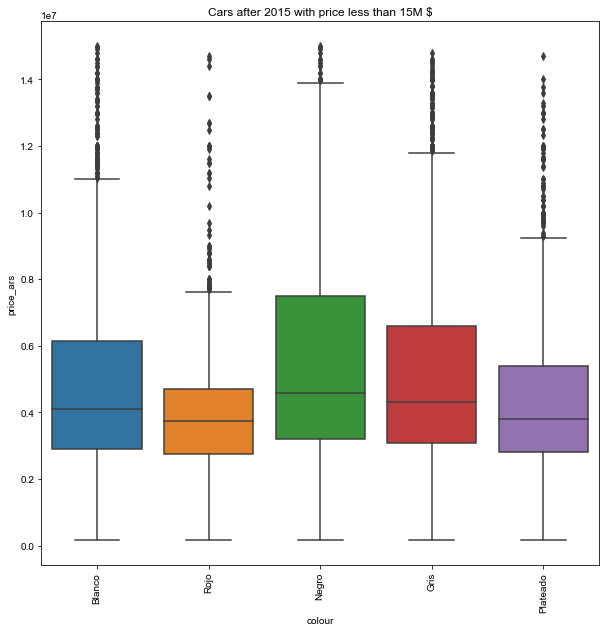

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x="colour", y="price_ars",  data=common_colours[(common_colours['price_ars']<15000000)  & (common_colours['year']>2015)])
sns.set(style="whitegrid")
plt.xticks(rotation=90)
plt.title("Cars after 2015 with price less than 15M $")

Text(0.5, 1.0, 'Cars before 2015 with price less than 10M $')

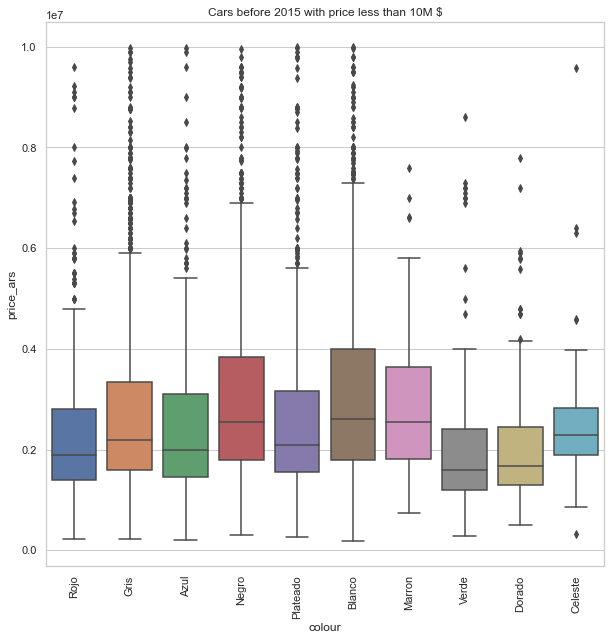

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x="colour", y="price_ars",  data=common_colours[(common_colours['price_ars']<10000000) & (common_colours['year']<2015)])
sns.set(style="whitegrid")
plt.xticks(rotation=90)
plt.title("Cars before 2015 with price less than 10M $")

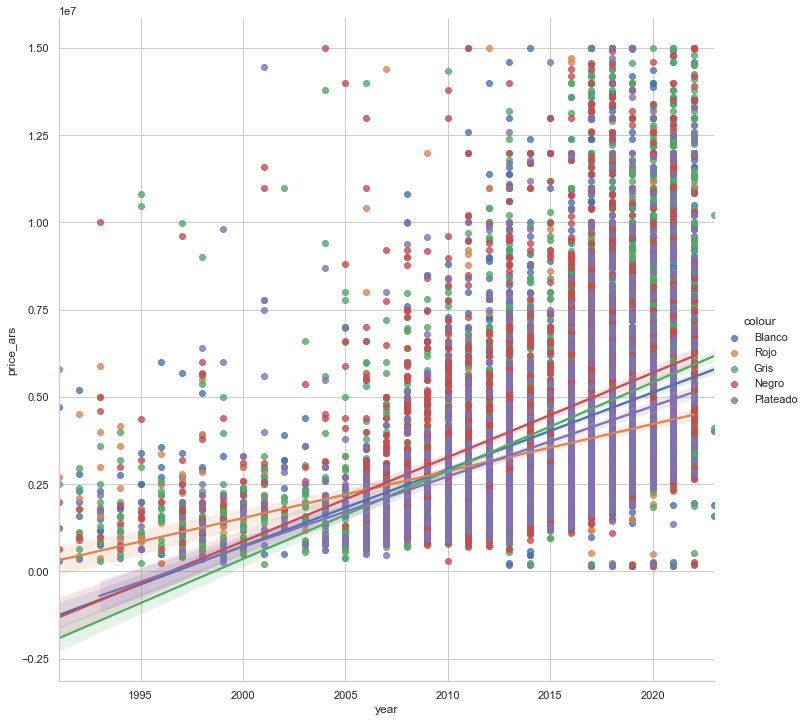

In [41]:
sns.lmplot(data=common_colours, x='year', y='price_ars', hue='colour', height=10)

#### We can see that in average, Black and white used cars retain more value. Green cars are cheapest

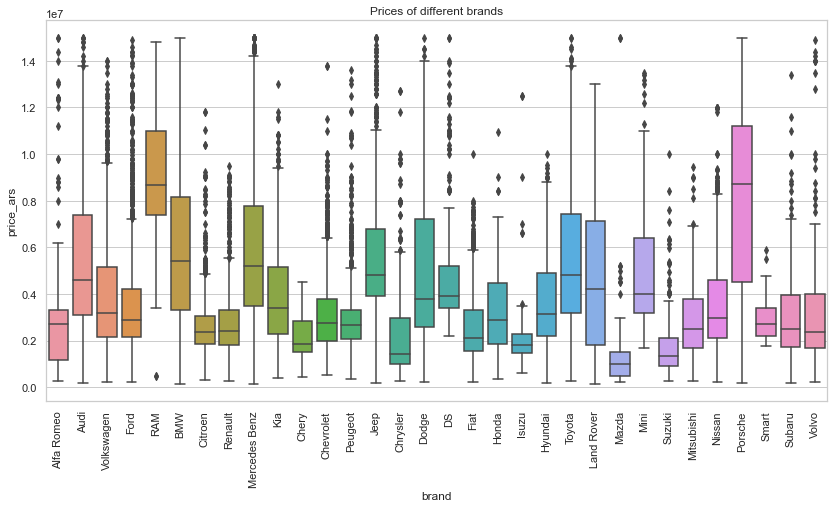

In [27]:

plt.figure(figsize=(14,7))


plt.title("Prices of different brands")
numeric_cols = ['brand', 'price_ars']
sns.boxplot(data=cars_data[numeric_cols], x='brand', y='price_ars')
plt.xticks(rotation=90)
plt.show()

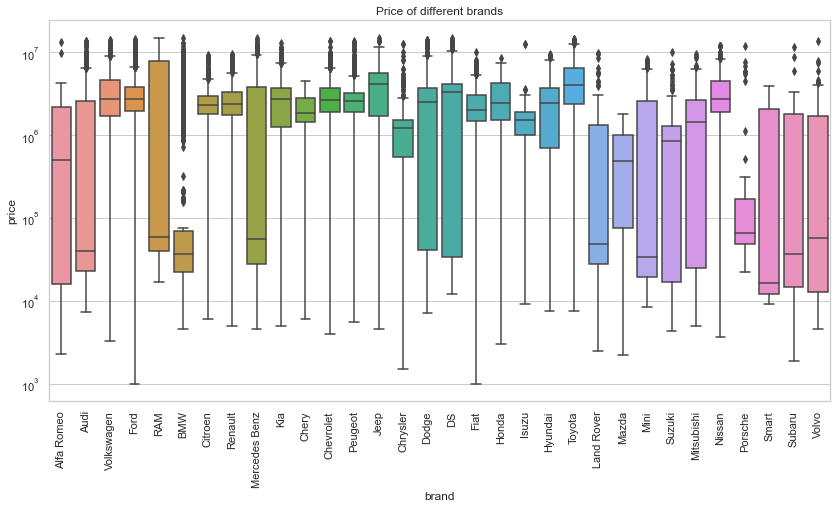

In [28]:

plt.figure(figsize=(14,7))


plt.title("Price of different brands")
numeric_cols = ['brand', 'price']

sns.boxplot(data=cars_data[numeric_cols], x='brand', y='price')
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

What are the most common brands?

Text(0, 0.5, 'Count')

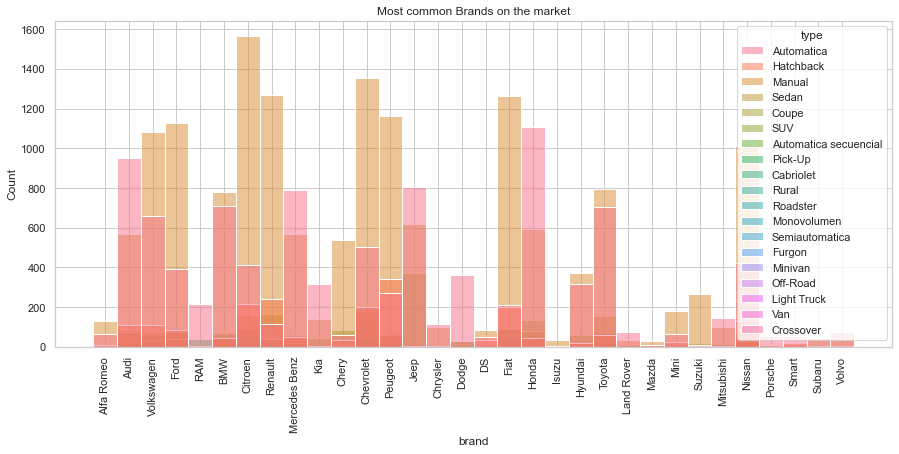

In [29]:

plt.figure(figsize=(15,6))
plt.title("Most common Brands on the market")
sns.histplot(data=cars_data, x='brand', hue='type')
plt.xticks(rotation=90)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

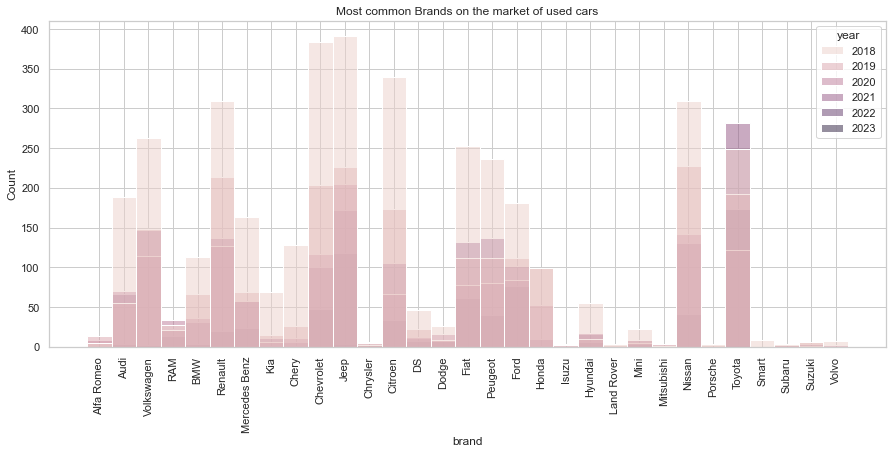

In [30]:

plt.figure(figsize=(15,6))
plt.title("Most common Brands on the market of used cars")
sns.histplot(data=cars_data[cars_data['year']>2017], x='brand', hue='year')
plt.xticks(rotation=90)
plt.ylabel("Count")

In [31]:
cars_data.describe()

,id,doors,price,year,km,price_ars
count,34007.000000,34007.000000,3.400700e+04,34007.000000,34007.000000,3.400700e+04
mean,17589.721146,4.339165,2.614607e+06,2014.096715,93863.153086,3.892020e+06
std,10112.217233,0.877588,2.270250e+06,5.537171,67821.058263,2.609610e+06
min,0.000000,1.000000,1.000000e+03,1991.000000,1.000000,1.550000e+05
25%,8827.500000,4.000000,9.925000e+05,2012.000000,47500.000000,2.100000e+06
50%,17566.000000,5.000000,2.300000e+06,2015.000000,83000.000000,3.150000e+06
75%,26369.500000,5.000000,3.700000e+06,2018.000000,127000.000000,4.840000e+06
max,35064.000000,8.000000,1.500000e+07,2023.000000,700000.000000,1.500000e+07


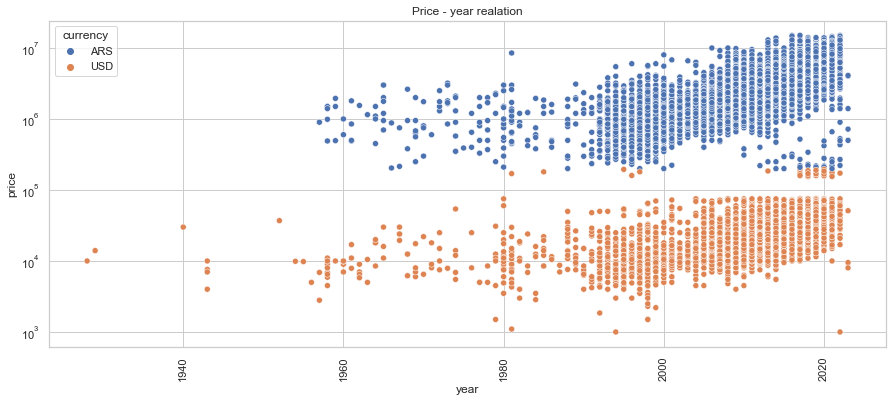

In [32]:

plt.figure(figsize=(15,6))
plt.title("Price - year realation")
sns.scatterplot(data=cars_data_all, x='year', y='price', hue='currency')
plt.xticks(rotation=90)
plt.ylabel("price")
plt.yscale('log')

###### From this scatterplot we can see that old cars (<1990) dont follow a pattern, they may be collectibles or have a different market. Thats why we choose to cut to cars with year >2000

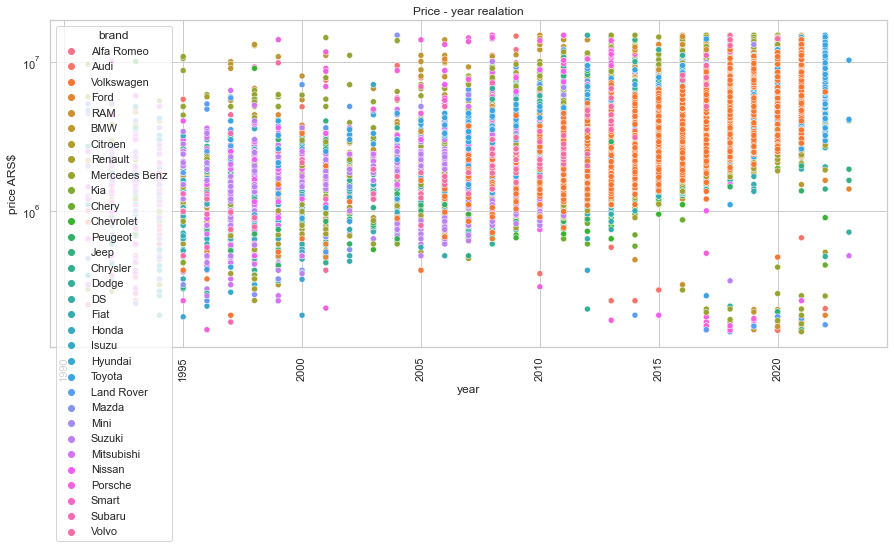

In [33]:

plt.figure(figsize=(15,6))
plt.title("Price - year realation")
sns.scatterplot(data=cars_data, x='year', y='price_ars', hue='brand')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

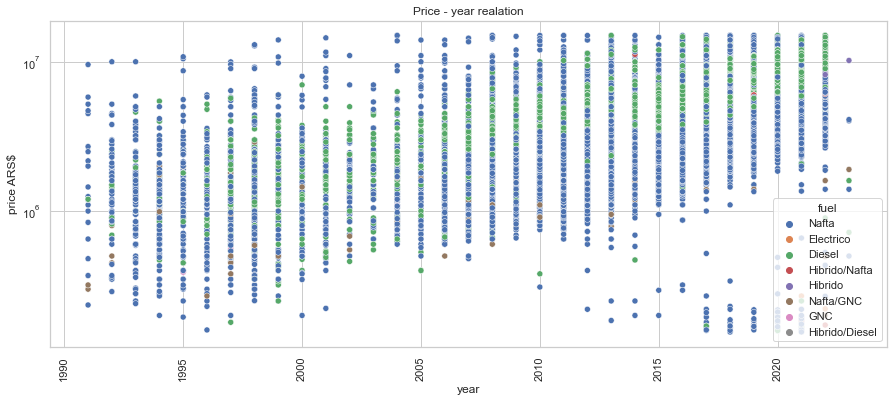

In [34]:

plt.figure(figsize=(15,6))
plt.title("Price - year realation")
sns.scatterplot(data=cars_data, x='year', y='price_ars', hue='fuel')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

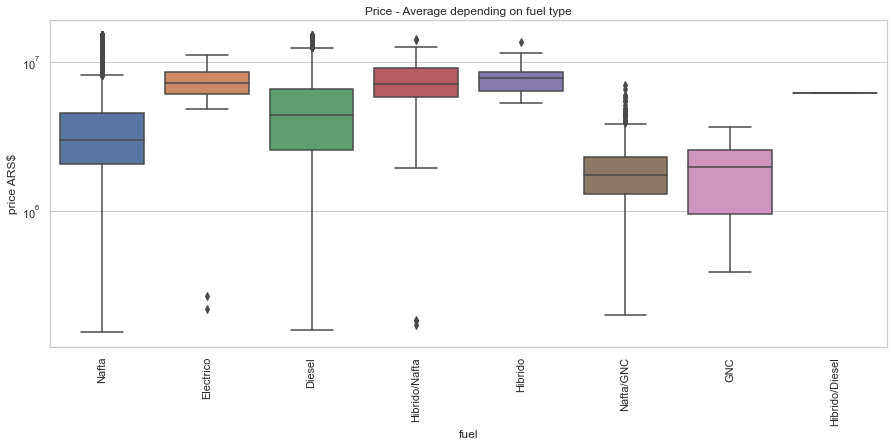

In [35]:
plt.figure(figsize=(15,6))
plt.title("Price - Average depending on fuel type")
sns.boxplot(data=cars_data, x='fuel', y='price_ars')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

###### Diesel cars seems to maintain the price between 2007 and 2015

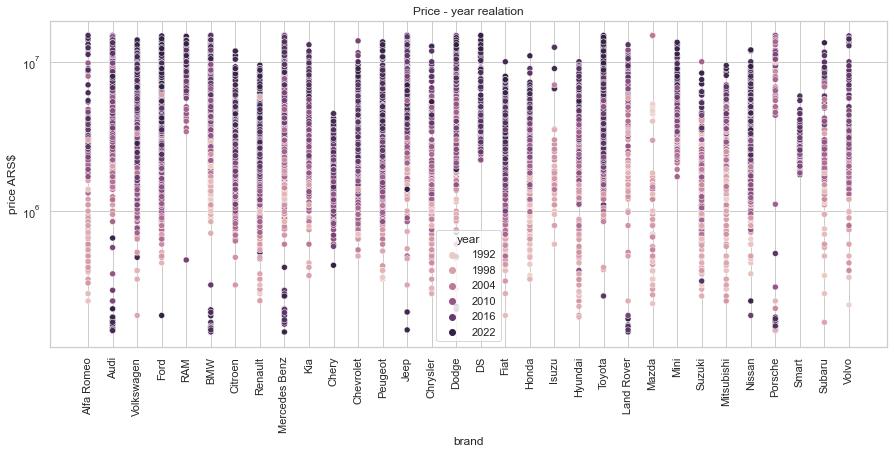

In [36]:

plt.figure(figsize=(15,6))
plt.title("Price - year realation")
sns.scatterplot(data=cars_data, x='brand', y='price_ars',hue='year')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

<AxesSubplot:>

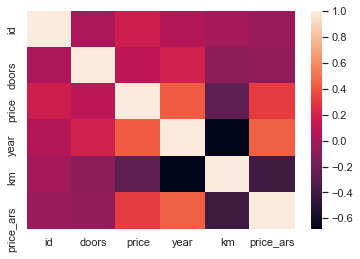

In [37]:
sns.heatmap(cars_data.corr())

###### we can see an obvious negative correlation between price and km and a positive corr between price and year 

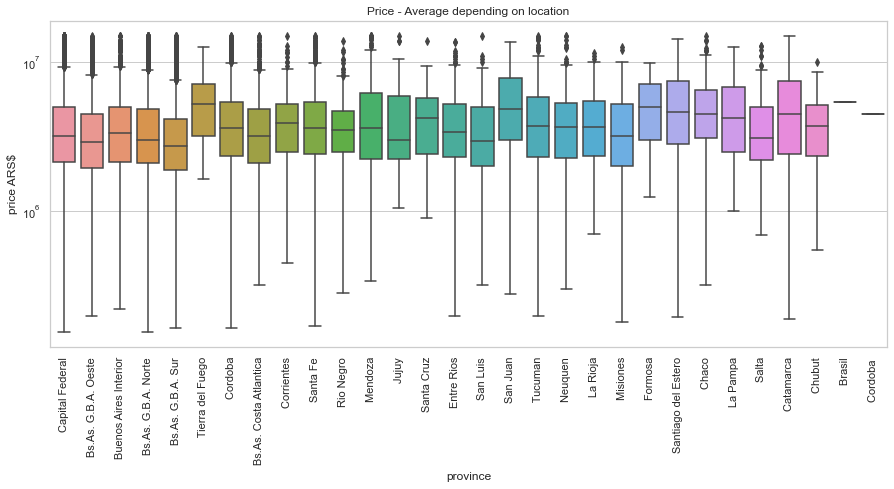

In [38]:
plt.figure(figsize=(15,6))
plt.title("Price - Average depending on location")
sns.boxplot(data=cars_data, x='province', y='price_ars')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

<AxesSubplot:title={'center':'Price - km'}, xlabel='km', ylabel='price ARS$'>

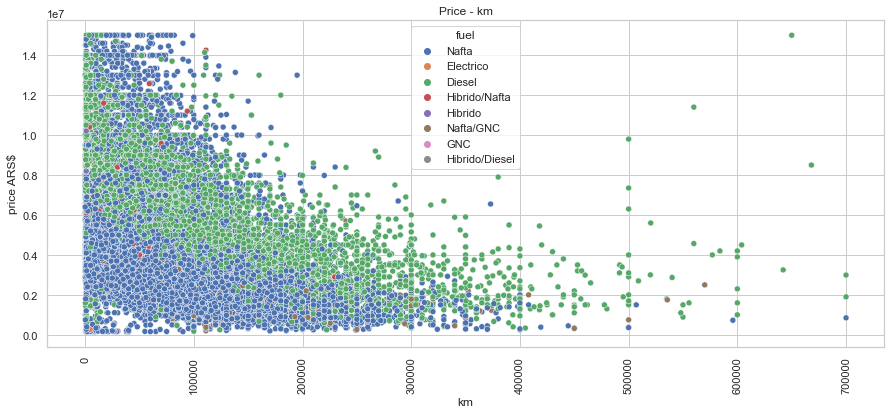

In [60]:
plt.figure(figsize=(15,6))
plt.title("Price - km")
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
sns.scatterplot(data=cars_data, x='km', y='price_ars', hue='fuel')

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Users\juan_\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

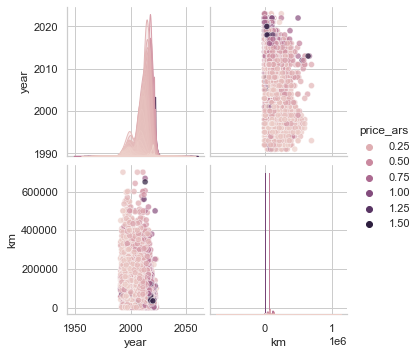

In [33]:
# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# Make the pair plot with a some aesthetic changes
sns.pairplot(cars_data[['year','km', 'price_ars']], hue = 'price_ars', diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

In [39]:
import geopandas as gpd
map_gdf = gdp.read_file("linea_de_limite.json")
map_gdf.head()

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
sns.lmplot(data=cars_data[cars_data['price']<80000000], x='year', y='price', hue='fuel', height=10)

#### Clustering with K-means

We'll see the evolution of price and year

In [46]:
from sklearn.cluster import KMeans

In [47]:
X = cars_data.loc[:,["price", "km"]]
X.head()

,price,km
0,3500000,74000
1,2940000,62000
2,2880000,48000
3,13300,51300
4,849000,10000


In [51]:
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.describe()

,price,km
count,3.400700e+04,34007.000000
mean,2.614607e+06,93863.153086
std,2.270250e+06,67821.058263
min,1.000000e+03,1.000000
25%,9.925000e+05,47500.000000
50%,2.300000e+06,83000.000000
75%,3.700000e+06,127000.000000
max,1.500000e+07,700000.000000


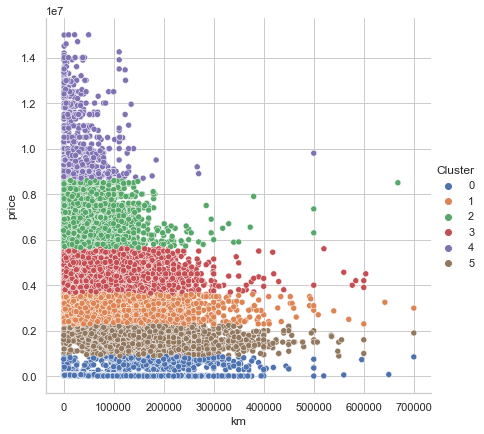

In [52]:
sns.relplot(
    x="km", y="price", hue="Cluster", data=X, height=6,
);

In [ ]:
cars_data[cars_data["province"].isnull()]['province']=cars_data[cars_data["province"].isnull()]['city']
cars_data[cars_data["province"].isnull()]['city']

In [ ]:
cars_data[cars_data['brand']=='Audi']

In [ ]:
df = pd.read_csv('autos_mercadolibre.csv')
df2 = pd.read_csv('last_scrap.csv')

In [ ]:
df3=pd.concat([df, df2], ignore_index=True, sort=False)

In [ ]:
df3[df3['Marca']=='Audi']